CUNY SPS Bridge:Math with Python
Name: Chinedu Onyeka

Problem 1: Even-Odd Vending Machine

In [1]:
#Check if even or odd
def even_odd(N):
    if N % 2 == 0:
        print('The number you entered is even')
        even = [N]
        while len(even) <= 9:
            N += 2
            even.append(N)
            p = even[0]
        print('The following are other even numbers including {}'.format(p),even)
    else:
        print('The number you entered is odd')
        odd = [N]
        while len(odd) <= 9:
            N += 2
            odd.append(N)
            p = odd[0]
        print('The following are other odd numbers including {}'.format(p),odd)

#Enter a value
if __name__ == '__main__':
    try:
        x = float(input('Please Enter a number: '))
    except ValueError:
        print('You did not enter a valid number')
        
    if x.is_integer(): #check if the number entered is an integer
        even_odd(x)
    else:
        print('You did not enter an integer')




Please Enter a number: 4
The number you entered is even
The following are other even numbers including 4.0 [4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0]


Problem 2: Exploring a Quadratic function visually

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def graph_quad(x,y):
    plt.plot(x,y)
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title('Exploring Quadratic Functions Visually\nGraph of y vs x')

x_values = range(-10,11)
y_values = []
for x in x_values:
    y = x**2 + 2*x + 1
    y_values.append(y)

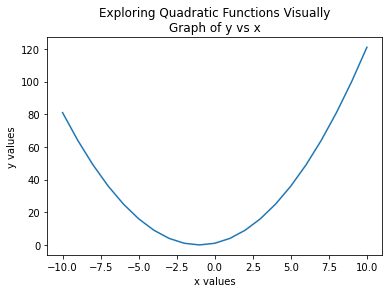

In [3]:
graph_quad(x_values,y_values)

Problem 3: Statistics Calculator

In [4]:
#Import relevant libraries
from collections import Counter

#Read the text file
def read_file(filename):
    numbers = []
    with open(filename) as f:
        for line in f:
            numbers.append(float(line))
    return numbers

#Calculate Mean
def calculate_mean(numbers):
    S = sum(numbers)
    N = len(numbers)
    mean = S/N
    
    return mean

#Calculate Median
def calculate_median(numbers):
    N = len(numbers)
    numbers.sort()
    
    if N % 2 == 0: #if the length of the numbers is even, median is the average of the two middle numbers
        m1 = N/2
        m2 = (N/2) + 1
        #convert to integer and get the index position
        m1 = int(m1) - 1
        m2 = int(m2) - 1
        median = (numbers[m1] + numbers[m2])/2 #The median is the average of the two(2) middle numbers
    else: #Median is the number at the middle of the 
        m = (N+1)/2
        #convert to integer and get the index position
        m = int(m) - 1
        median = numbers[m]
        
    return median

#Calculate Mode
def calculate_mode(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    
    return mode[0][0]

#Calculate mean difference
def find_differences(numbers):
    mean = calculate_mean(numbers)
    #find difference in mean
    diff = []
    for num in numbers:
        diff.append(num - mean)
        
        return diff

#Calculate the variance
def calculate_variance(numbers):
    diff = find_differences(numbers)
    #find the squared difference
    squared_diff = []
    for d in diff:
        squared_diff.append(d**2)
    #find the variance
    sum_of_squared_diff = sum(squared_diff)
    variance = sum_of_squared_diff/len(numbers)
    
    return variance

#Calculate the Standard deviation
def calculate_standard_deviation(numbers):
    variance = calculate_variance(numbers)
    std_deviation = variance**0.5
    
    return std_deviation

In [5]:
import errno
import os

if __name__ == '__main__':
    try:
        data = input('Enter the full text file path and extention: ')
    except EnvironmentError as e:
        if e.rrno == errno.ENOENT:
            print('You did not enter the correct file name or path')
        else: 
            raise
    data = read_file(data)
    mean = calculate_mean(data)
    median = calculate_median(data)
    mode = calculate_mode(data)
    variance = calculate_variance(data)
    std_deviation = calculate_standard_deviation(data)
    
    #Print the results:
    print('Mean: {}'.format(mean))
    print('Median: {}'.format(median))
    print('Mode: {}'.format(mode))
    print('Variance: {}'.format(variance))
    print('Std Deviation: {}'.format(std_deviation))
    

Enter the full text file path and extention: mydata.txt
Mean: 477.75
Median: 500.0
Mode: 100.0
Variance: 14542.921875
Std Deviation: 120.59403747698308


Problem 4: Solving Single Variable InEquality

In [6]:
#function that solves an inequality
from sympy import *

def isolve(function):
    x = Symbol('x')
    lhs = function.lhs

    if lhs.is_polynomial():

        p = Poly(lhs, x)
        rel = function.rel_op

        return solve_poly_inequality(p, rel)

    elif lhs.is_rational_function():

        numer, denom = lhs.as_numer_denom()
        p1 = Poly(numer)
        p2 = Poly(denom)
        rel = sympify(function).rel_op

        return solve_rational_inequalities([[((p1, p2), rel)]])

    else:

        return solve_univariate_inequality(function, x, relational=False)

func = input('Enter any inequality: ')
isolve(sympify(func))

Enter any inequality: x-3<0


[Interval.open(-oo, 3)]

Problem 5: Law of Large Numbers

In [7]:
import random
from sympy import *

def roll():
    return random.randint(1, 6)

def trial_average(trials):
    num_rolls = 0
    score = 0

    while num_rolls < trials:
        die_roll = roll()
        num_rolls += 1
        score += die_roll

    trial_average = score / trials

    print('Trials: {0}, Trial average: {1}'.format(num_rolls, trial_average))


trial_average(100)
trial_average(1000)
trial_average(10000)
trial_average(100000)
trial_average(500000)

Trials: 100, Trial average: 3.48
Trials: 1000, Trial average: 3.525
Trials: 10000, Trial average: 3.4777
Trials: 100000, Trial average: 3.50895
Trials: 500000, Trial average: 3.5028


Problem 6: Doing Gradient Descent

Enter a function in one variable: 2*x**2 + 3*x + 1
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 1
x: -0.747501574739872
Minimum value: -0.124987515742439


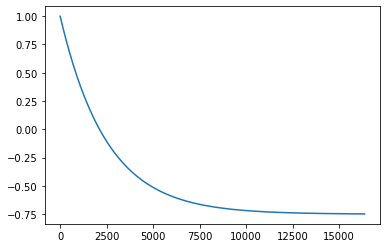

In [8]:
import matplotlib.pyplot as plt
from sympy import Derivative, Symbol, sympify, solve


def grad_descent(x0, f1x, x):

    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return

    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
    x_list = []

    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
        x_list.append(x_new)

    return x_new, x_list

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, x_list = grad_descent(var0, d, var)

        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({var: var_min})))

        plt.plot(x_list)